In [92]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

date_cols = [2, 19, 20, 26, 29, 30]
injuries = pd.read_csv('data/injuries_cleaned.csv', parse_dates=date_cols)


In [93]:
injuries_df = injuries.copy()
print(injuries_df.shape)
injuries_df.head()

(6540, 47)


,PlayerName,PlayerId,PlayerDOB,Height,Weight,Positions,GroupPosition,DraftPick,IsActive,FirstSeason,...,cbc,out_for_season,out_indefinitely,surgery,sprain,broken,bruise,strain,bone,main_body_part
0,Steve Blake,blakest01,1980-02-26,75.0,172.0,Point Guard,G,38.0,False,2004,...,False,False,True,True,False,False,False,False,False,abdomen
1,Alan Anderson,anderal01,1982-10-16,78.0,220.0,"Small Forward, Shooting Guard",F,NaN,False,2006,...,False,False,False,False,False,False,False,False,False,abdomen
2,Arron Afflalo,afflaar01,1985-10-15,77.0,210.0,"Small Forward, Shooting Guard",G,27.0,False,2008,...,False,False,False,False,False,False,False,True,False,abdomen
3,Bobby Simmons,simmobo01,1980-06-02,79.0,210.0,"Power Forward, Small Forward, Shooting Guard",F,41.0,False,2002,...,False,False,False,False,False,False,False,True,False,abdomen
4,D.J. Augustine,augusdj01,1987-11-10,71.0,183.0,Point Guard,G,9.0,True,2009,...,False,False,True,False,False,False,False,True,False,abdomen


# Log Transform

In [95]:
injuries_df['log10_days_injured'] = np.log10(injuries_df['DaysInjured'])

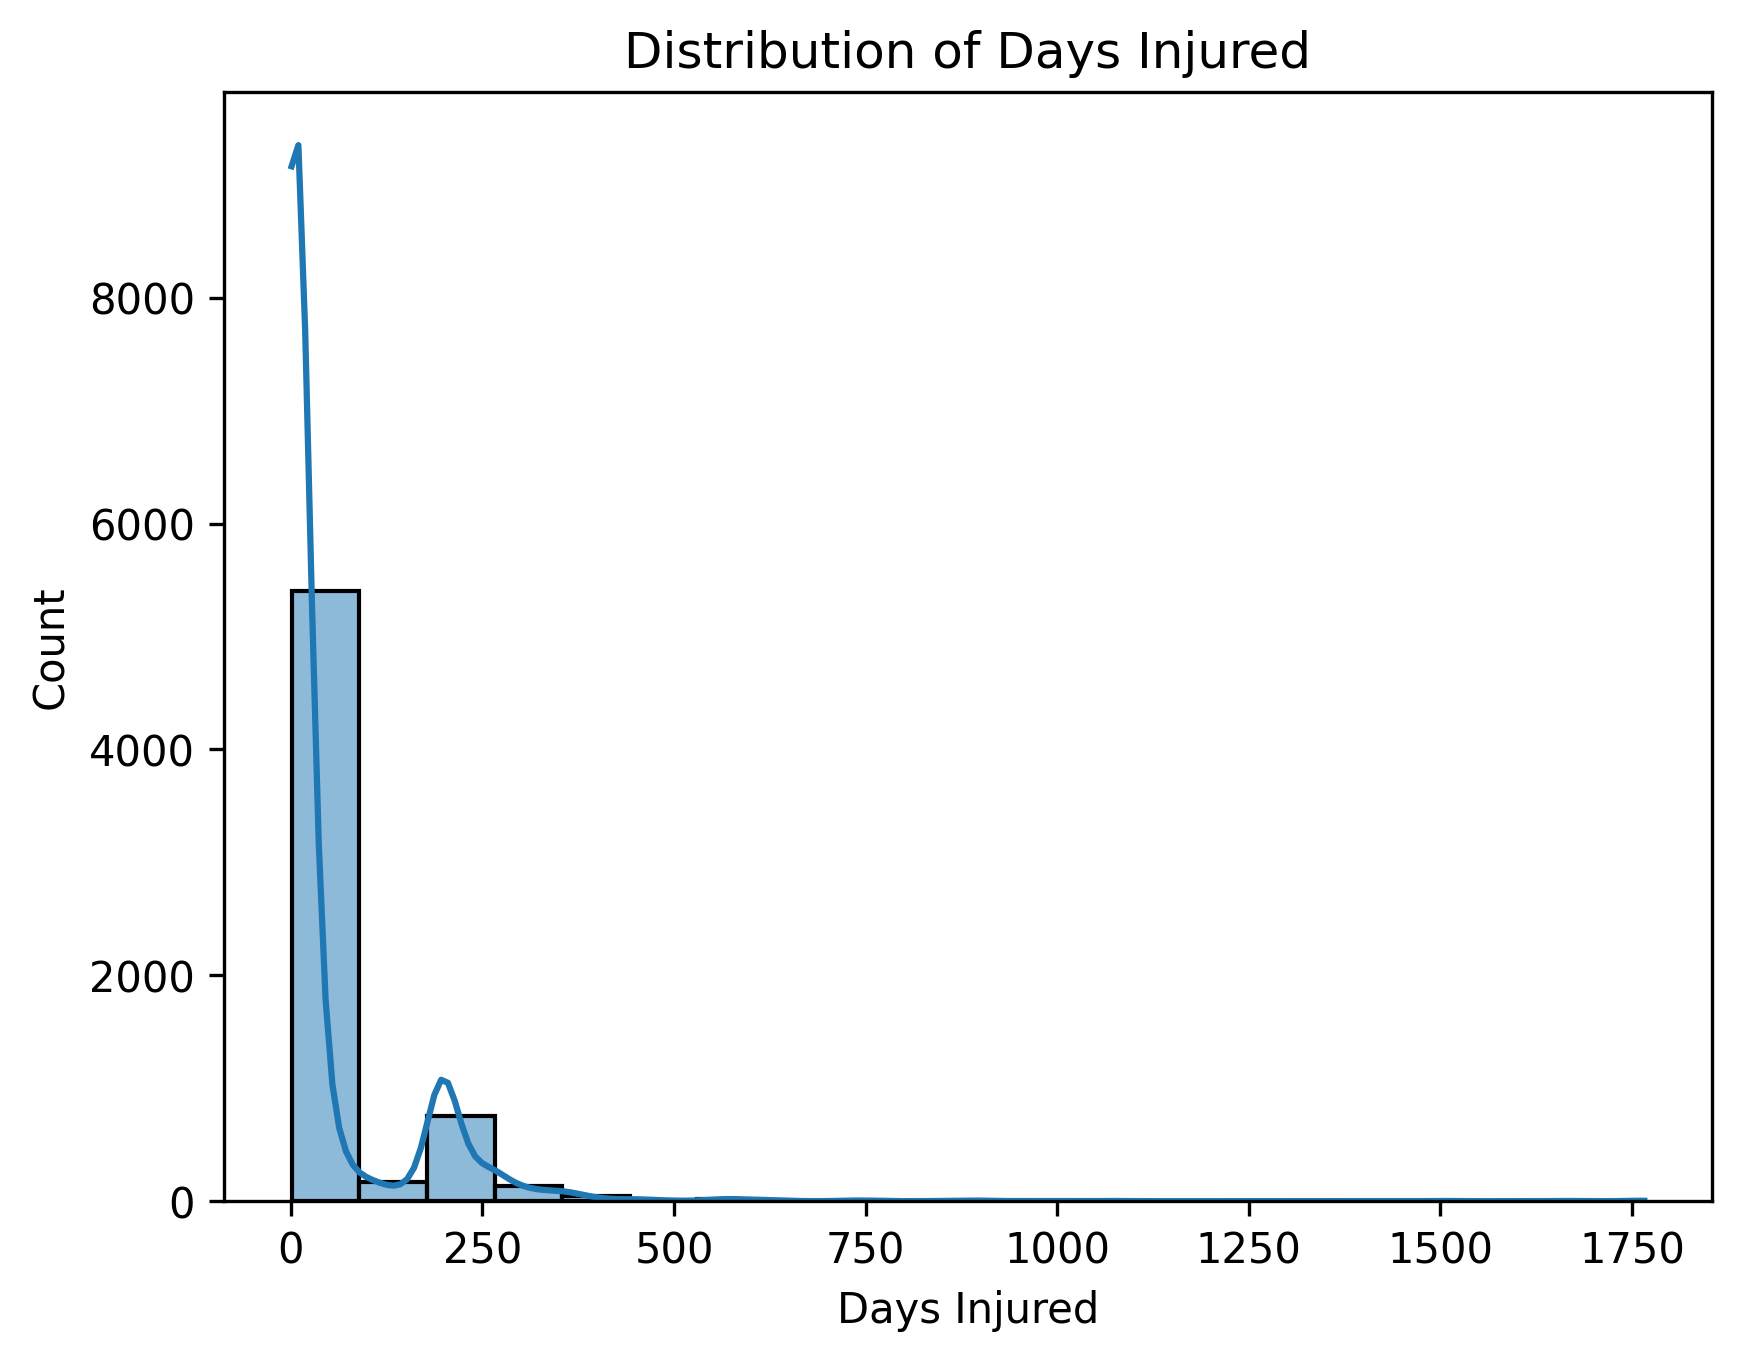

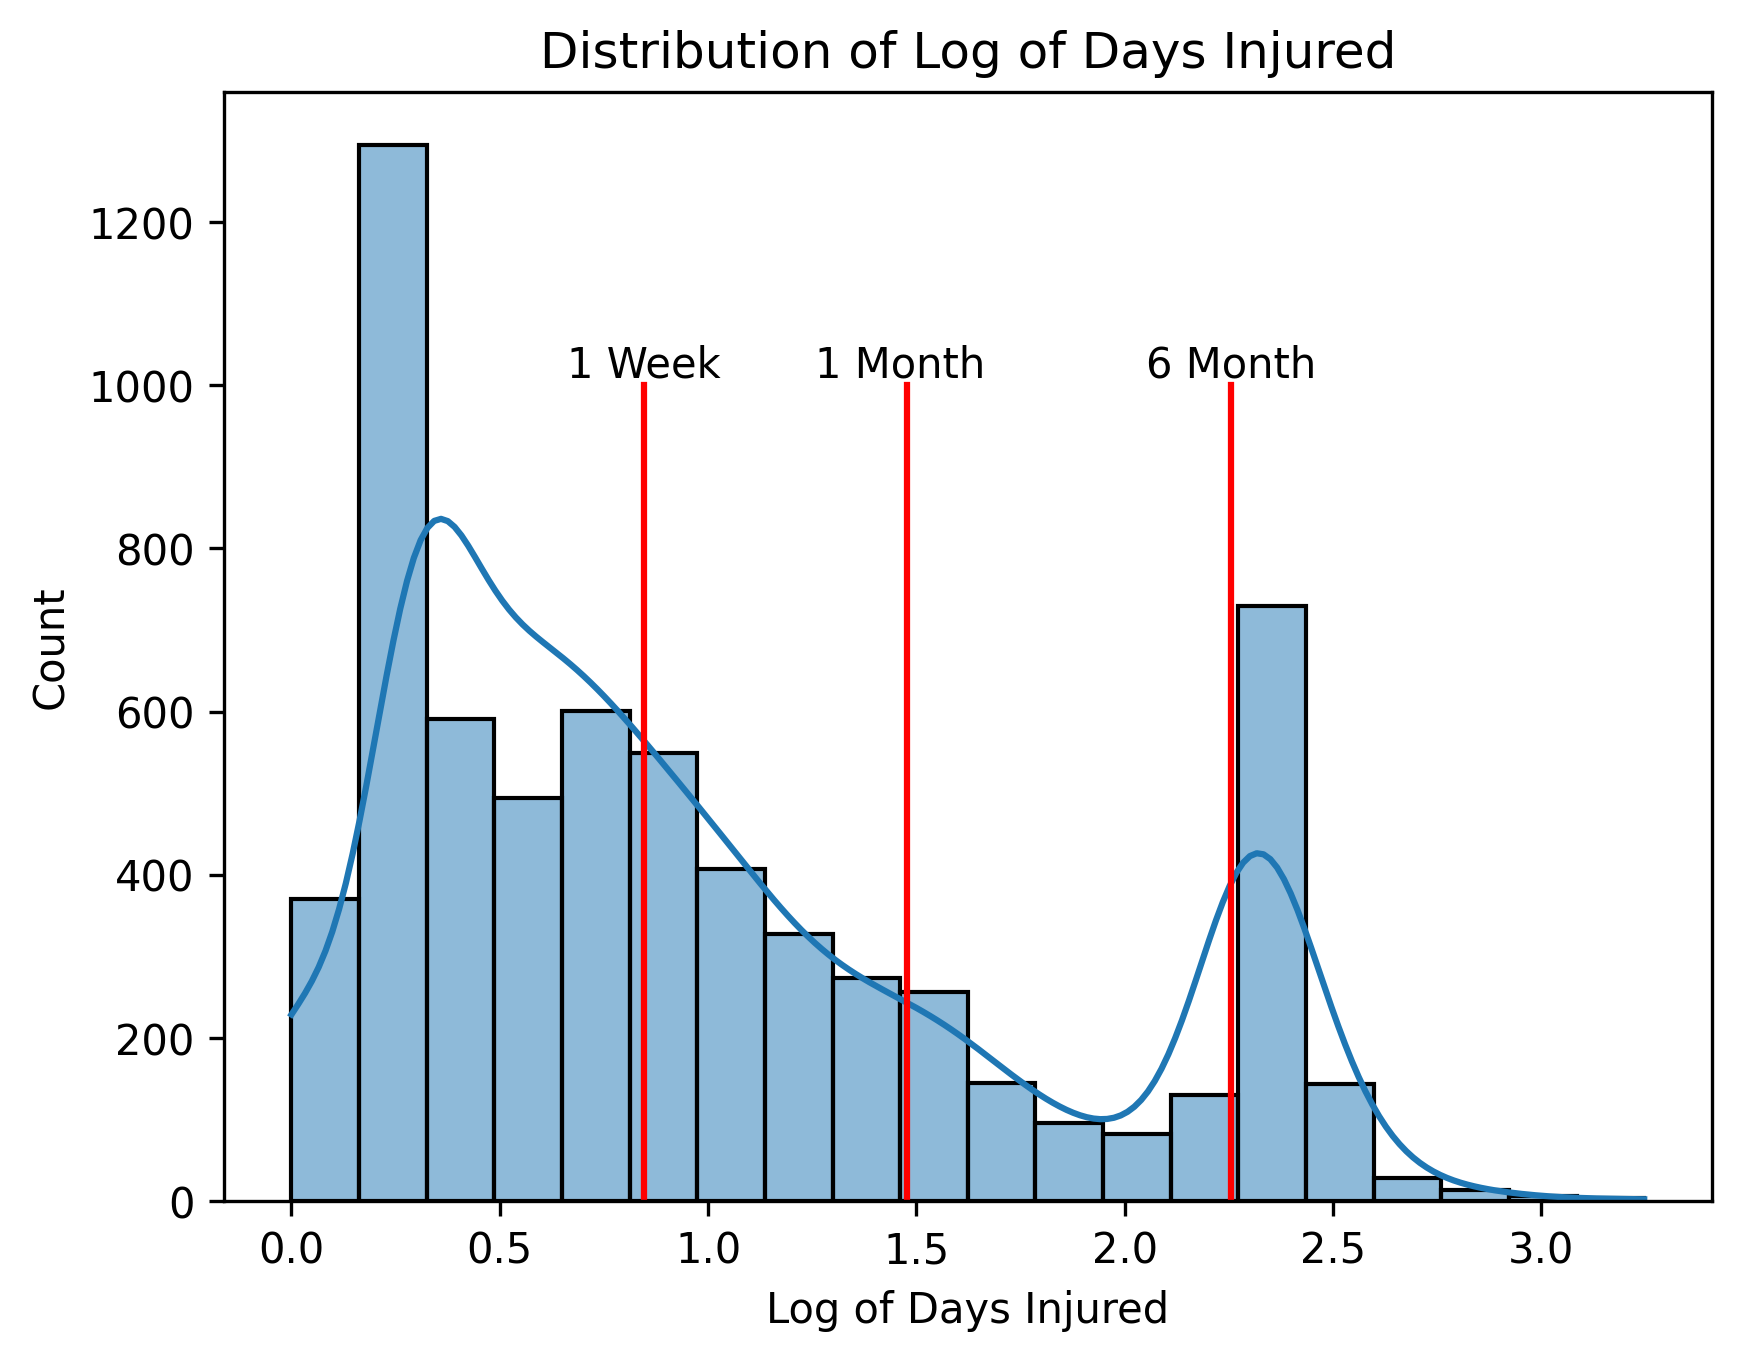

In [15]:
plt.figure(dpi=300)
sns.histplot(data=injuries_df, x='DaysInjured', bins=20, kde=True)
plt.title('Distribution of Days Injured')
plt.xlabel('Days Injured')
plt.ylabel('Count')
plt.show() 

plt.figure(dpi=300)
sns.histplot(data=injuries_df, x='log10_days_injured', bins=20, kde=True)
t6 = np.log10(30*6)
t1 = np.log10(30)
tw = np.log10(7)

plt.plot([t6, t6], [0, 1000], color='#FF0000')
plt.text(t6, 1010, '6 Month', ha='center')
plt.plot([t1, t1], [0, 1000], color='#FF0000')
plt.text(t1, 1010, '1 Month ', ha='center')
plt.plot([tw, tw], [0, 1000], color='#FF0000')
plt.text(tw, 1010, '1 Week', ha='center')

plt.title('Distribution of Log of Days Injured')
plt.xlabel('Log of Days Injured')
plt.ylabel('Count')
plt.show() 

# Frequency 

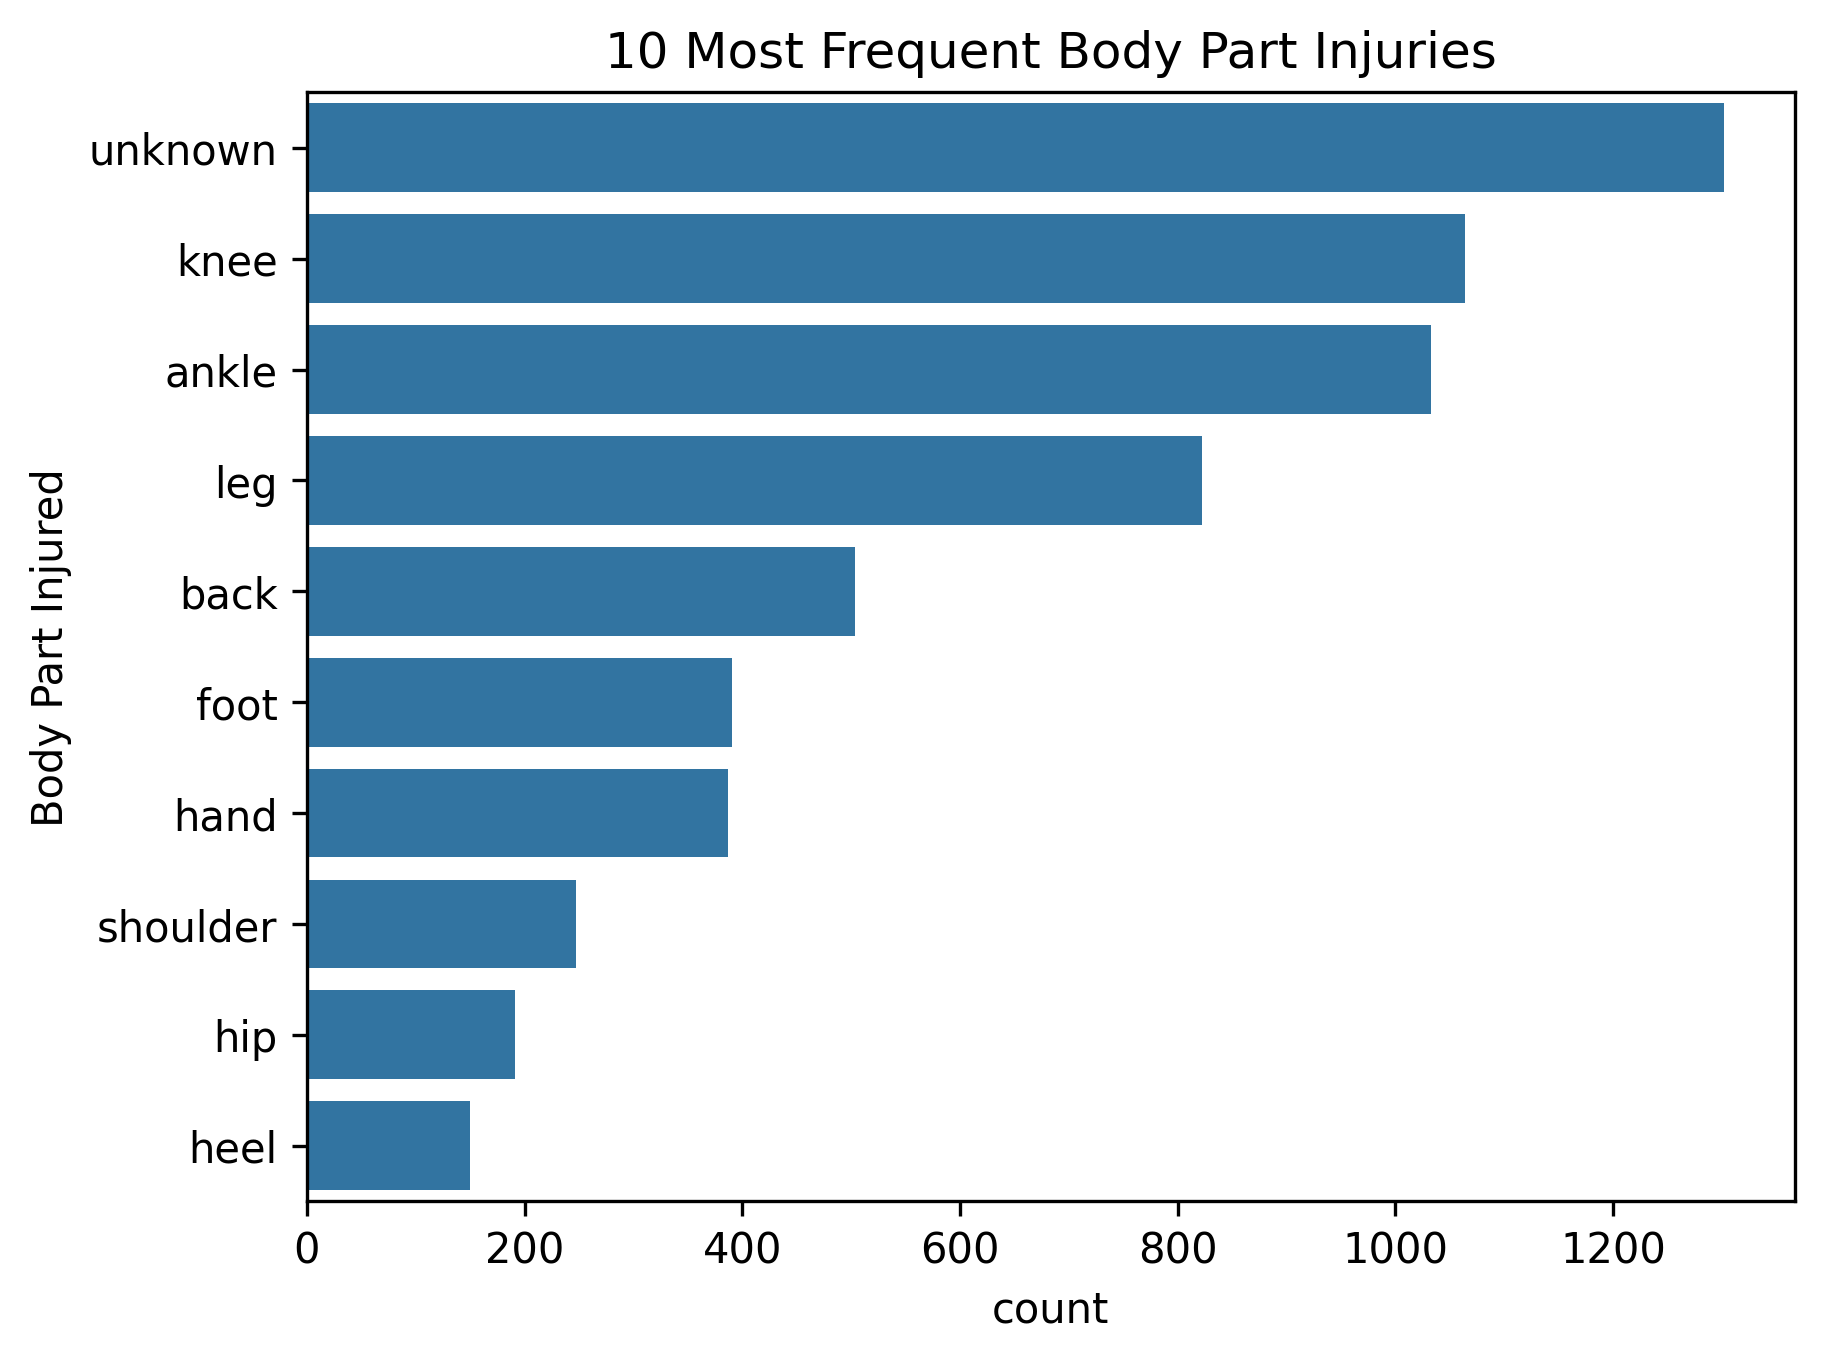

In [32]:
plt.figure(dpi=300)
count_df = injuries_df['main_body_part'].value_counts().head(10)
sns.barplot(x=count_df, y=count_df.index)
plt.title('10 Most Frequent Body Part Injuries')
plt.ylabel('Body Part Injured')
plt.show()

In [ ]:
# Keywords 

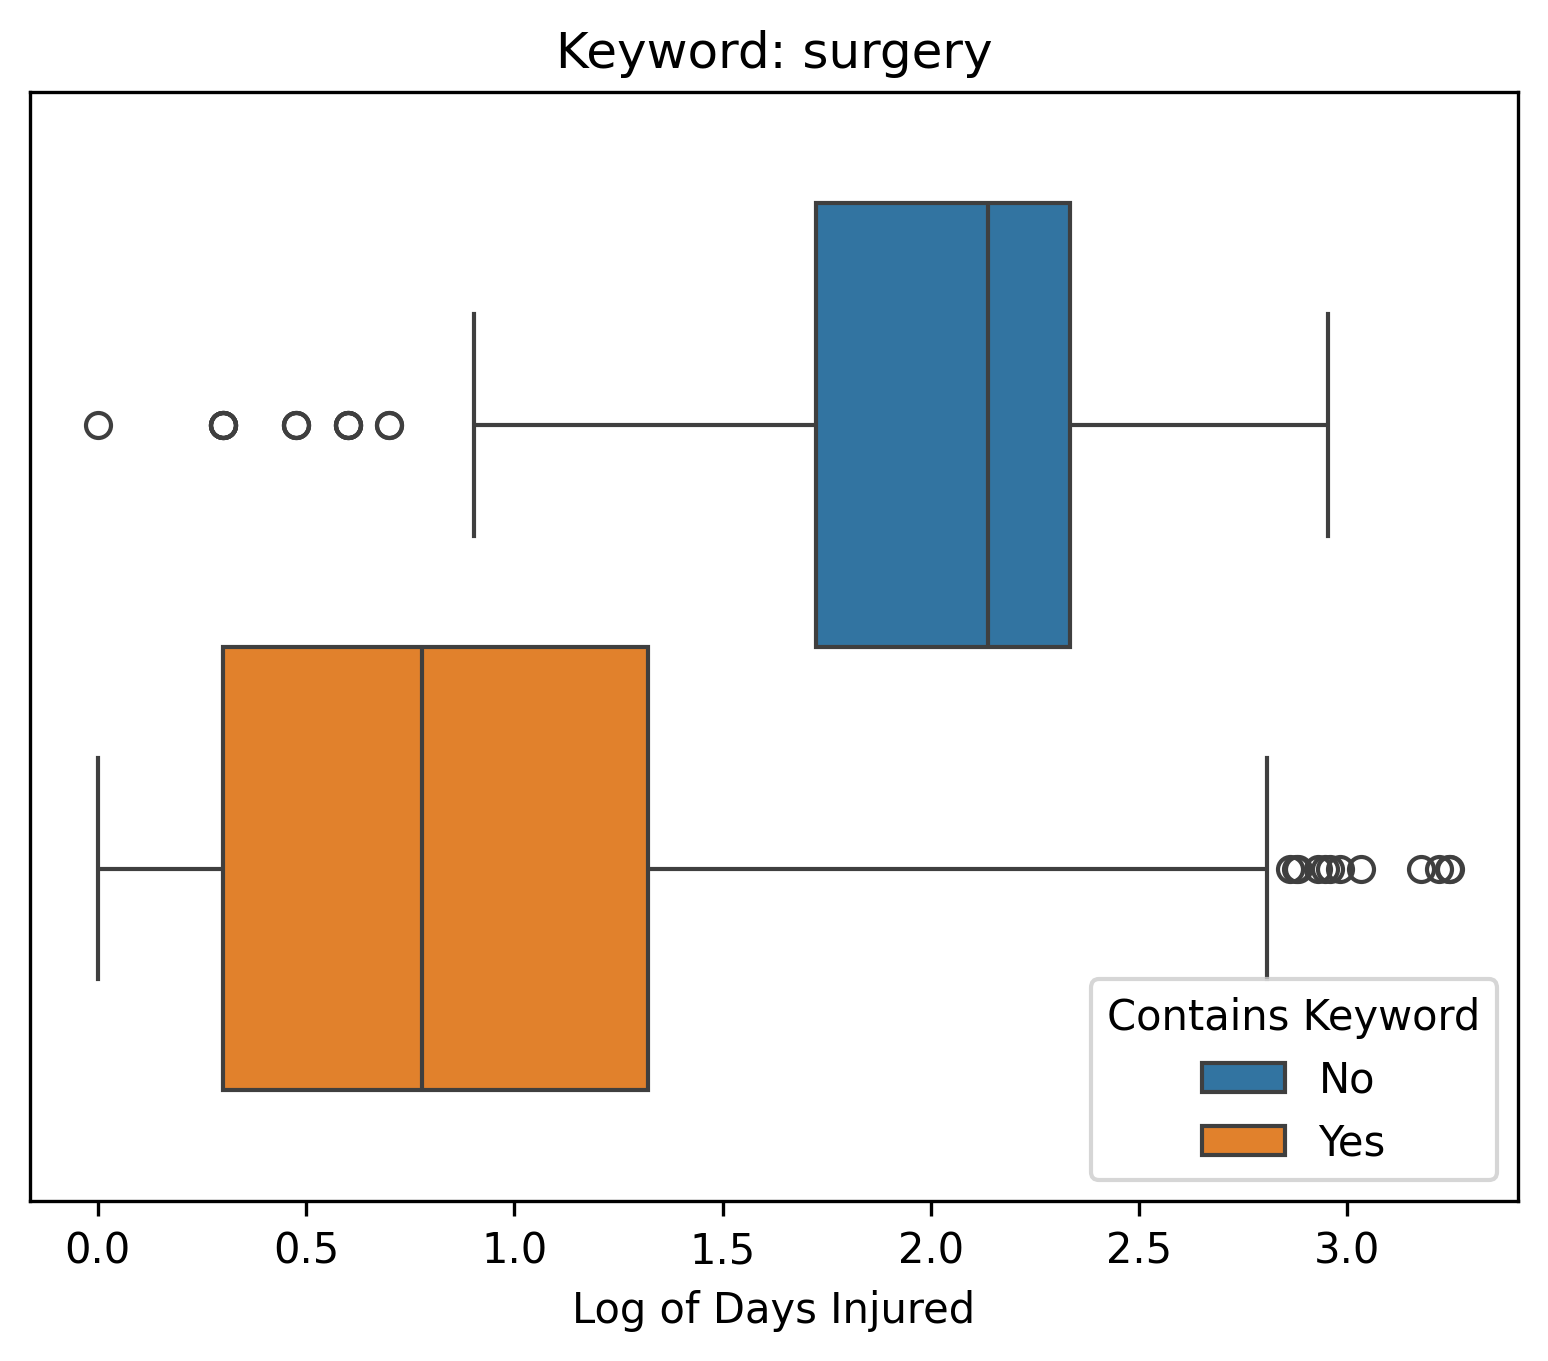

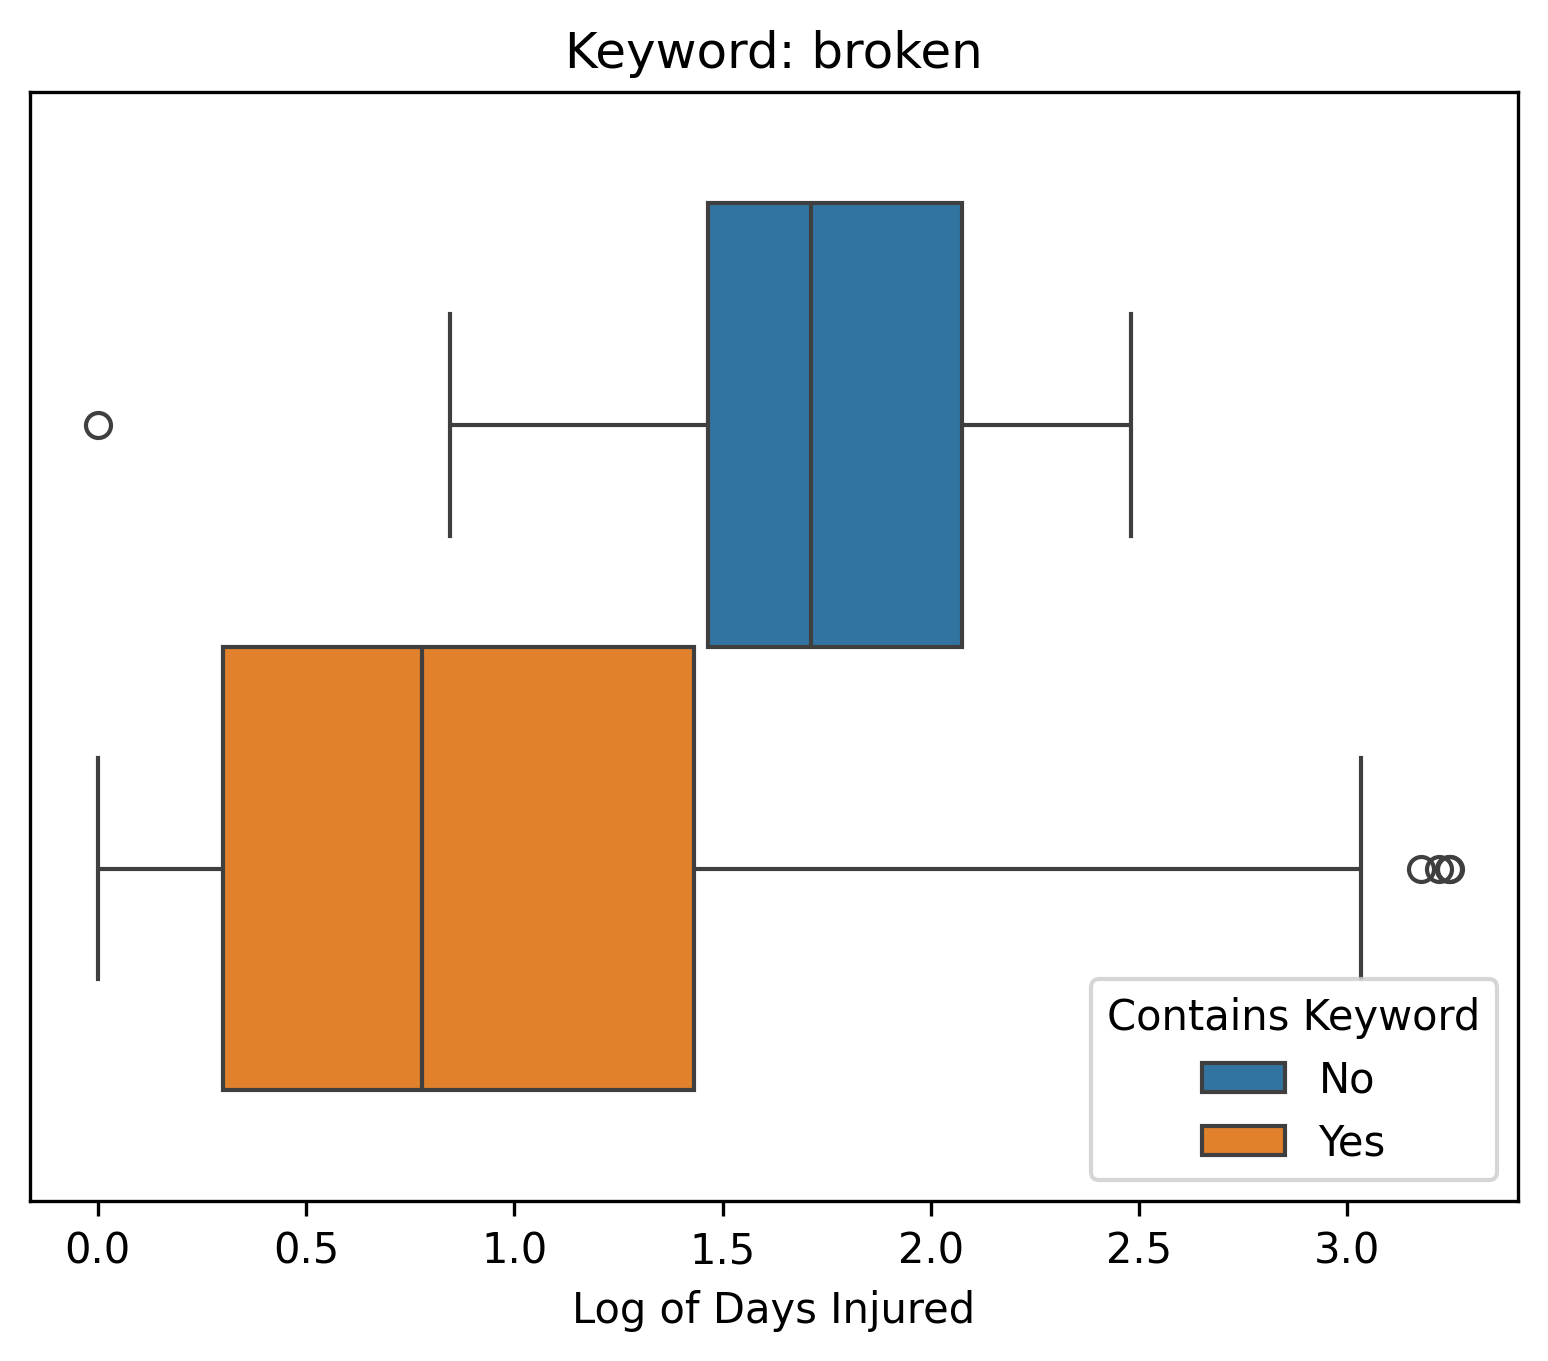

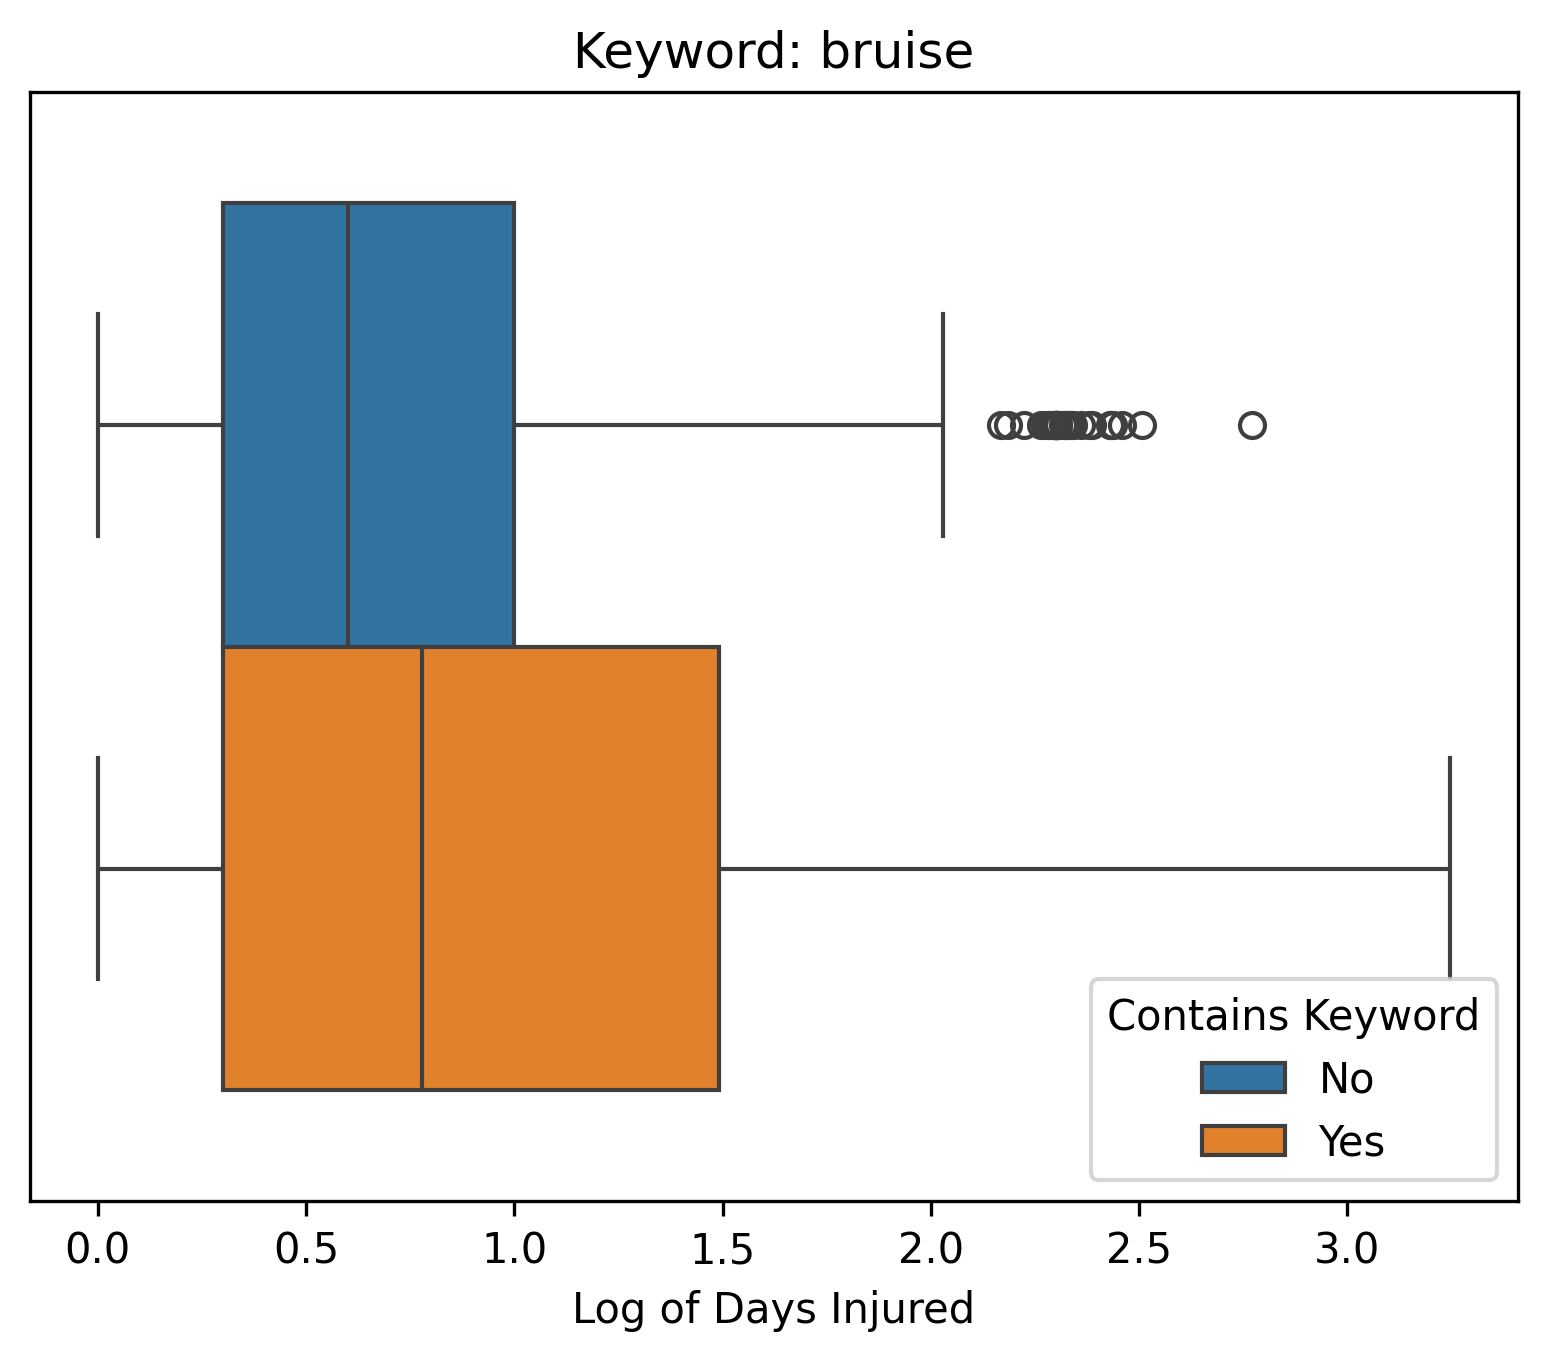

In [122]:
def bool_box(col):
    plt.figure(dpi=300)
    plt.title('Keyword: ' + col)
    ax = sns.boxplot(data=injuries_df, x='log10_days_injured', hue=col, hue_order=[True, False])
    ax.set_yticks([])
    plt.xlabel('Log of Days Injured')
    plt.legend(title='Contains Keyword', labels=['No', 'Yes'], loc=4)


bools = ['surgery', 'broken', 'bruise']

for b in bools:
    bool_box(b)